# **Phase 1: EDA and Model Implementation without class balancing and hyperparameter tuning**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)

Mounted at /content/gdrive


In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme(style = "darkgrid")
%matplotlib inline


from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model


from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.layers import *
from keras import backend


from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import GridSearchCV
from hyperopt import STATUS_OK
import lightgbm as lgb
from hyperopt import fmin, tpe, Trials


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import  mean_squared_error, r2_score,plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,precision_score, recall_score,f1_score, confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense





In [ ]:
credit_df = pd.read_csv('gdrive/My Drive/Thesis_Research_LJMU/creditcard.csv')
credit_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
credit_df.shape

(284807, 31)

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_df[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [ ]:
100*credit_df.isnull().sum()/len(credit_df)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [ ]:
credit_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

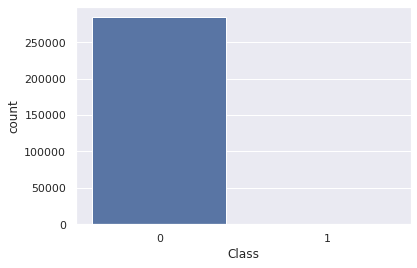

In [ ]:
sns.countplot('Class', data= credit_df)

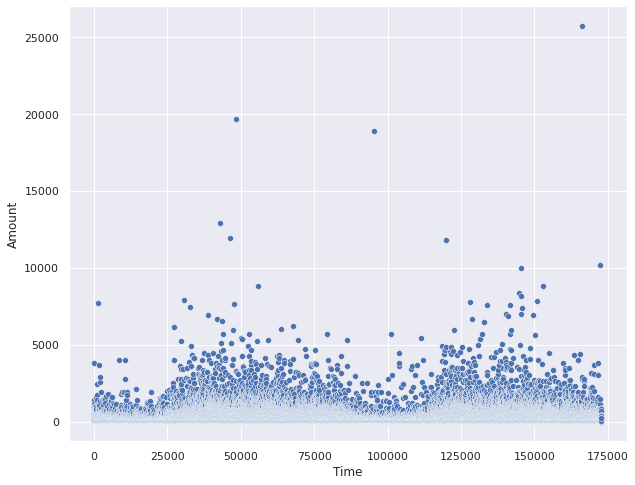

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x= credit_df['Time'], y = credit_df['Amount'])


In [ ]:
credit_df['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: Time, Length: 124592, dtype: int64

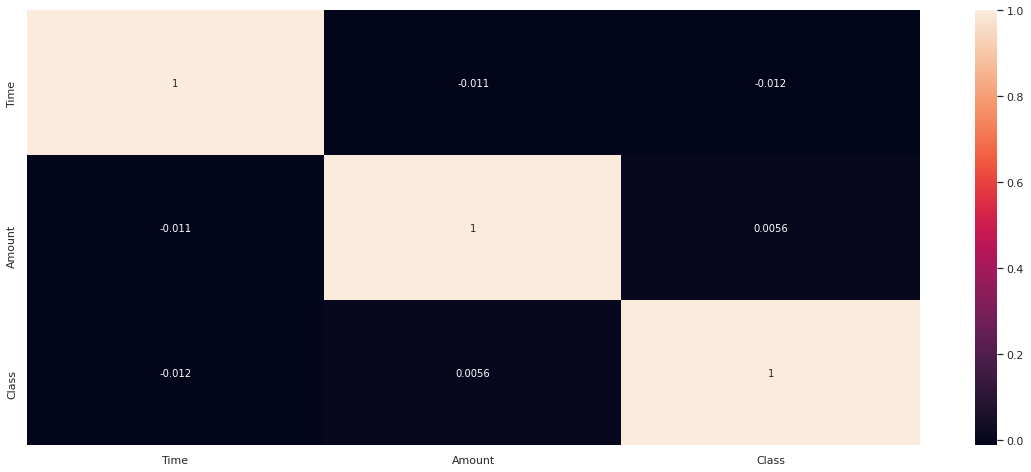

In [ ]:
plt.figure(figsize = (20,8))
sns.heatmap(credit_df[['Time','Amount','Class']].corr(), annot = True)

In [ ]:
X = credit_df.drop(['Class'], axis =1)
y = credit_df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 142)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

lr_pred = logreg.predict(X_test)
print("Accuracy {}".format(metrics.accuracy_score(y_test, lr_pred)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, lr_pred)))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

tpr = recall_score(y_test, lr_pred)
tnr = recall_score(y_test, lr_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Accuracy 0.9991222218320986
Recall/Sensitivity 0.5230769230769231
[[85300    13]
 [   62    68]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85313
           1       0.84      0.52      0.64       130

    accuracy                           1.00     85443
   macro avg       0.92      0.76      0.82     85443
weighted avg       1.00      1.00      1.00     85443

False Positive rate =0.000
True Positive Rate = 0.523
False Negative rate =0.477
True Negative Rate = 1.000


Logistic: ROC AUC = 0.981


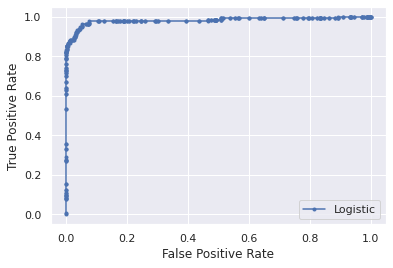

In [ ]:
lr_probs = logreg.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

#ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC = %.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [ ]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
print("Accuracy {}".format(metrics.accuracy_score(y_test, rf_pred)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, rf_pred)))
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test, rf_pred))

tpr = recall_score(y_test, rf_pred)
tnr = recall_score(y_test, rf_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Accuracy 0.999602073897218
Recall/Sensitivity 0.7615384615384615
[[85310     3]
 [   31    99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85313
           1       0.97      0.76      0.85       130

    accuracy                           1.00     85443
   macro avg       0.99      0.88      0.93     85443
weighted avg       1.00      1.00      1.00     85443

False Positive rate =0.000
True Positive Rate = 0.762
False Negative rate =0.238
True Negative Rate = 1.000


Random Forest: ROC AUC=0.948


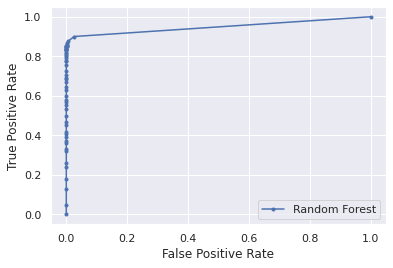

In [ ]:
rf_probs = rf_model.predict_proba(X_test)
rf_probs = rf_probs[:, 1]


rf_auc = roc_auc_score(y_test, rf_probs)
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [ ]:

#svm=SVC(probability=True)
#svm.fit(X_train,y_train)
#svm_pred=svm.predict(X_test)

#print("Accuracy {}".format(metrics.accuracy_score(y_test, svm_pred)))
#print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, svm_pred)))
#print(confusion_matrix(y_test,svm_pred))
#print(classification_report(y_test, svm_pred))



In [ ]:

#svm_probs = svm.predict_proba(X_test)
#svm_probs = svm_probs[:, 1]


#svm_auc = roc_auc_score(y_test, svm_probs)
#print('SVM: ROC AUC=%.3f' % (svm_auc))
#svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
#pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')


#pyplot.xlabel('False Positive Rate')
#pyplot.ylabel('True Positive Rate')

#pyplot.legend()

#pyplot.show()



In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

print("Accuracy {}".format(metrics.accuracy_score(y_test, gbc_pred)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, gbc_pred)))
print(confusion_matrix(y_test, gbc_pred))
print(classification_report(y_test, gbc_pred))

tpr = recall_score(y_test, gbc_pred)
tnr = recall_score(y_test, gbc_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Accuracy 0.99916903666772
Recall/Sensitivity 0.5230769230769231
[[85304     9]
 [   62    68]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85313
           1       0.88      0.52      0.66       130

    accuracy                           1.00     85443
   macro avg       0.94      0.76      0.83     85443
weighted avg       1.00      1.00      1.00     85443

False Positive rate =0.000
True Positive Rate = 0.523
False Negative rate =0.477
True Negative Rate = 1.000


Gradient Boosting: ROC AUC=0.669


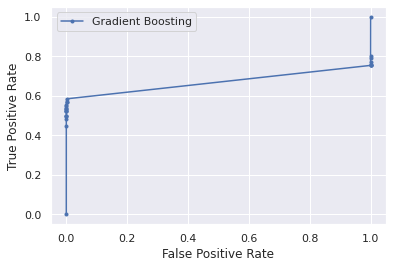

In [ ]:
gbc_probs = gbc.predict_proba(X_test)
gbc_probs = gbc_probs[:, 1]


gbc_auc = roc_auc_score(y_test, gbc_probs)
print('Gradient Boosting: ROC AUC=%.3f' % (gbc_auc))
gbc_fpr, gbc_tpr, _ = roc_curve(y_test, gbc_probs)
pyplot.plot(gbc_fpr, gbc_tpr, marker='.', label='Gradient Boosting')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("Accuracy {}".format(metrics.accuracy_score(y_test, xgb_pred)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, xgb_pred)))
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

tpr = recall_score(y_test, xgb_pred)
tnr = recall_score(y_test, xgb_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Accuracy 0.9995552590615966
Recall/Sensitivity 0.7538461538461538
[[85307     6]
 [   32    98]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85313
           1       0.94      0.75      0.84       130

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

False Positive rate =0.000
True Positive Rate = 0.754
False Negative rate =0.246
True Negative Rate = 1.000


XGBoost: ROC AUC=0.989


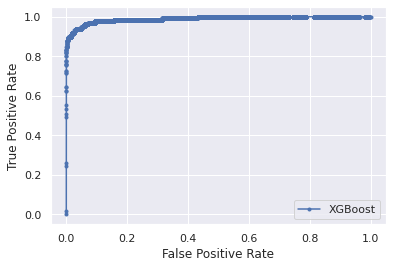

In [ ]:
xgb_probs = xgb.predict_proba(X_test)
xgb_probs = xgb_probs[:, 1]


xgb_auc = roc_auc_score(y_test, xgb_probs)
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [ ]:
input_n = X_train.shape[1]
model = Sequential()

model.add(Dense(65, input_shape=(input_n,), kernel_initializer='he_normal' ,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.3)

print(history.history.keys())

#return model

#_,accuracy = model.evaluate(X,y)
#print('Accuracy: %2f' % (accuracy*100))

yhat_probs = model.predict(X_test, verbose=0)

yhat_classes = model.predict_classes(X_test, verbose=0)

yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]


accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)

recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)

f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)

matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)


tpr = recall_score(y_test, yhat_classes)
tnr = recall_score(y_test, yhat_classes, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 65)                2015      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1320      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 3,776
Trainable params: 3,776
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
13956/13956 [==============================] - 63s 3ms/step - loss: 0.0143 - accuracy: 0.9985 - val_loss: 0.0045 - val_accuracy: 0.9991
Epoch 2/10
13956/13956 [==============================] - 47s 3ms/step - loss: 0.0042 - accuracy: 0.9993 

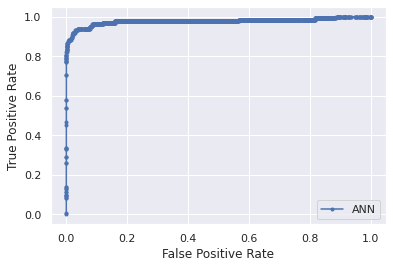

In [ ]:
ann_fpr, ann_tpr, _ = roc_curve(y_test, yhat_probs)
pyplot.plot(ann_fpr, ann_tpr, marker='.', label='ANN')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

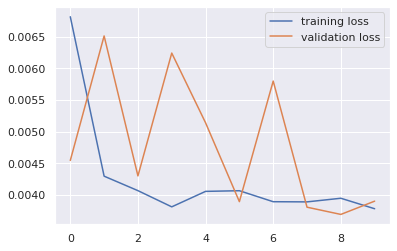

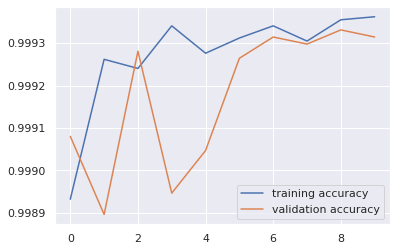

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()

plt.figure()
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

plt.show()

# **Phase 2: Class Balancing Methods(SMOTE and ADASYN)**
 

In [ ]:
credit_class = credit_df.copy()

In [ ]:
credit_class.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
X = credit_class.drop(['Class'], axis =1)
y = credit_class['Class']

SMOTE

In [ ]:
X_train_smote, y_train_smote = SMOTE(random_state=1234).fit_resample(X, y.values.ravel())
#smote_value_counts = y_train_smote["Class"].value_counts()
#print("Fraudulent transactions are %.2f%% of the test set." % (smote_value_counts[0] * 100 / len(y_train_smote)))

y_resample=pd.DataFrame(y_train_smote)
X_resample=pd.DataFrame(X_train_smote)




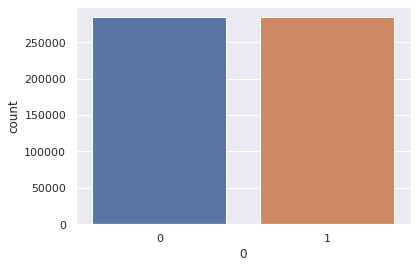

In [ ]:
sns.countplot(y_resample.iloc[:,0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3, random_state=142)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
logregsm = LogisticRegression()
logregsm.fit(X_train, y_train)

lr_predsm = logregsm.predict(X_test)
print("Accuracy {}".format(metrics.accuracy_score(y_test, lr_predsm)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, lr_predsm)))
print(confusion_matrix(y_test, lr_predsm))
print(classification_report(y_test, lr_predsm))

tpr = recall_score(y_test, lr_predsm)
tnr = recall_score(y_test, lr_predsm, pos_label = 0)
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Accuracy 0.9769680342812256
Recall/Sensitivity 0.9619892675578987
[[84914   699]
 [ 3230 81746]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     85613
           1       0.99      0.96      0.98     84976

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589

False Positive rate =0.008
True Positive Rate = 0.962
False Negative rate =0.038
True Negative Rate = 0.992


Logistic: ROC AUC=0.997


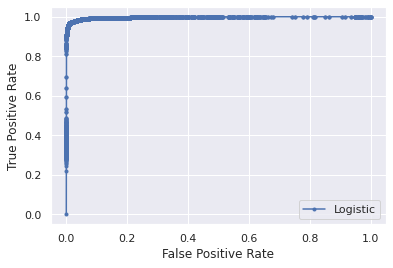

In [ ]:
lr_probsm = logregsm.predict_proba(X_test)
lr_probsm = lr_probsm[:, 1]


lr_auc = roc_auc_score(y_test, lr_probsm)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probsm)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [ ]:
rf_modelsm = RandomForestClassifier()

rf_modelsm.fit(X_train, y_train)

rf_predsm = rf_modelsm.predict(X_test)
print("Accuracy {}".format(metrics.accuracy_score(y_test, rf_predsm)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, rf_predsm)))
print(confusion_matrix(y_test,rf_predsm))
print(classification_report(y_test, rf_predsm)) 

tpr = recall_score(y_test, rf_predsm)
tnr = recall_score(y_test, rf_predsm, pos_label = 0)
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Accuracy 0.9998944832316269
Recall/Sensitivity 1.0
[[85595    18]
 [    0 84976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85613
           1       1.00      1.00      1.00     84976

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

False Positive rate =0.000
True Positive Rate = 1.000
False Negative rate =0.000
True Negative Rate = 1.000


Random Forest: ROC AUC=1.000


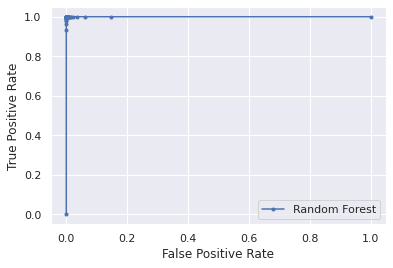

In [ ]:
rf_probsm = rf_modelsm.predict_proba(X_test)
rf_probsm = rf_probsm[:, 1]


rf_auc = roc_auc_score(y_test, rf_probsm)
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probsm)
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [ ]:

#svm_sm=SVC(probability=True)
#svm_sm.fit(X_train,y_train)
#svm_pred_sm=svm.predict(X_test)

#print("Accuracy {}".format(metrics.accuracy_score(y_test, svm_pred_sm)))
#print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, svm_pred_sm)))
#print(confusion_matrix(y_test,svm_pred_sm))
#print(classification_report(y_test, svm_pred_sm))


In [ ]:

#svm_probsm = svm.predict_proba(X_test)
#svm_probsm = svm_probsm[:, 1]


#svm_auc = roc_auc_score(y_test, svm_probsm)
#print('SVM: ROC AUC=%.3f' % (svm_auc))
#svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probsm)
#pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')


#pyplot.xlabel('False Positive Rate')
#pyplot.ylabel('True Positive Rate')

#pyplot.legend()

#pyplot.show()


In [ ]:
gbcsm = GradientBoostingClassifier()
gbcsm.fit(X_train, y_train)
gbc_predsm = gbcsm.predict(X_test)

print("Accuracy {}".format(metrics.accuracy_score(y_test, gbc_predsm)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, gbc_predsm)))
print(confusion_matrix(y_test, gbc_predsm))
print(classification_report(y_test, gbc_predsm))

tpr = recall_score(y_test, gbc_predsm)
tnr = recall_score(y_test, gbc_predsm, pos_label = 0)
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Accuracy 0.9871562644719178
Recall/Sensitivity 0.979723686688006
[[85145   468]
 [ 1723 83253]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     85613
           1       0.99      0.98      0.99     84976

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589

False Positive rate =0.005
True Positive Rate = 0.980
False Negative rate =0.020
True Negative Rate = 0.995


Gradient Boosting: ROC AUC=0.999


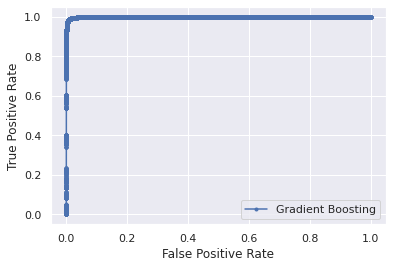

In [ ]:
gbc_probsm = gbcsm.predict_proba(X_test)
gbc_probsm = gbc_probsm[:, 1]


gbc_auc = roc_auc_score(y_test, gbc_probsm)
print('Gradient Boosting: ROC AUC=%.3f' % (gbc_auc))
gbc_fpr, gbc_tpr, _ = roc_curve(y_test, gbc_probsm)
pyplot.plot(gbc_fpr, gbc_tpr, marker='.', label='Gradient Boosting')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [ ]:
xgbsm = XGBClassifier()
xgbsm.fit(X_train, y_train)
xgb_predsm = xgbsm.predict(X_test)

print("Accuracy {}".format(metrics.accuracy_score(y_test, xgb_predsm)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, xgb_predsm)))
print(confusion_matrix(y_test, xgb_predsm))
print(classification_report(y_test, xgb_predsm))


tpr = recall_score(y_test, xgb_predsm)
tnr = recall_score(y_test, xgb_predsm, pos_label = 0)
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Accuracy 0.9873145396244776
Recall/Sensitivity 0.9806298248917341
[[85095   518]
 [ 1646 83330]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     85613
           1       0.99      0.98      0.99     84976

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589

False Positive rate =0.006
True Positive Rate = 0.981
False Negative rate =0.019
True Negative Rate = 0.994


XGBoost: ROC AUC=0.992


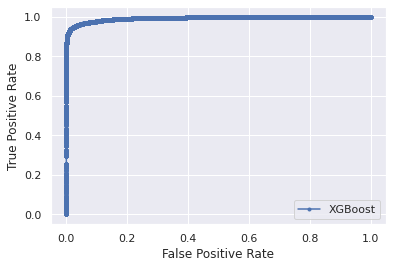

In [ ]:
xgb_probsm = xgbsm.predict_proba(X_test)
xgb_probsm = xgb_probsm[:, 1]


xgb_auc = roc_auc_score(y_test, xgb_probsm)
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probsm)
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [ ]:
input_n = X_train.shape[1]
modelsm = Sequential()

modelsm.add(Dense(65, input_shape=(input_n,), kernel_initializer='he_normal' ,activation='relu'))
#model.add(Dropout(0.2))
modelsm.add(Dense(20, activation='relu'))
modelsm.add(Dense(20, activation='relu'))
#modelsm.add(Dropout(0.2))
modelsm.add(Dense(1, activation='sigmoid'))
modelsm.summary()

modelsm.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
history = modelsm.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.3)
print(history.history.keys())

#return model

#_,accuracy = model.evaluate(X,y)
#print('Accuracy: %2f' % (accuracy*100))

yhat_probsm = modelsm.predict(X_test, verbose=0)

yhat_classesm = modelsm.predict_classes(X_test, verbose=0)

yhat_probsm = yhat_probsm[:, 0]
yhat_classesm = yhat_classesm[:, 0]


accuracy = accuracy_score(y_test, yhat_classesm)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, yhat_classesm)
print('Precision: %f' % precision)

recall = recall_score(y_test, yhat_classesm)
print('Recall: %f' % recall)

f1 = f1_score(y_test, yhat_classesm)
print('F1 score: %f' % f1)

auc = roc_auc_score(y_test, yhat_probsm)
print('ROC AUC: %f' % auc)

matrix = confusion_matrix(y_test, yhat_classesm)
print(matrix)

tpr = recall_score(y_test, yhat_classesm)
tnr = recall_score(y_test, yhat_classesm, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 65)                2015      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1320      
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 3,776
Trainable params: 3,776
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
27863/27863 [==============================] - 96s 3ms/step - loss: 0.1188 - accuracy: 0.9577 - val_loss: 0.0617 - val_accuracy: 0.9784
Epoch 2/10
27863/27863 [==============================] - 94s 3ms/step - loss: 0.0687 - accuracy: 0.976

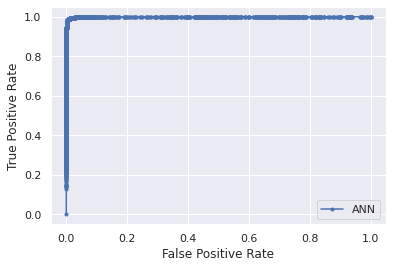

In [ ]:
ann_fpr, ann_tpr, _ = roc_curve(y_test, yhat_probsm)
pyplot.plot(ann_fpr, ann_tpr, marker='.', label='ANN')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

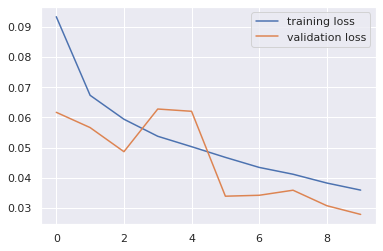

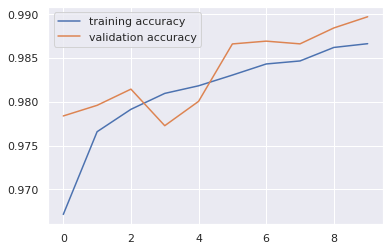

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()

plt.figure()
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

plt.show()

ADASYN

In [ ]:
credit_ada = credit_df.copy()

In [ ]:
credit_ada.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
X = credit_ada.drop(['Class'], axis =1)
y = credit_ada['Class']

In [ ]:
#X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#	          n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
#oversample = ADASYN()
X_train_ada, y_train_ada = ADASYN().fit_resample(X, y)

In [ ]:
#X_train_smote, y_train_smote = SMOTE(random_state=1234).fit_resample(X, y.values.ravel())
#smote_value_counts = y_train_smote["Class"].value_counts()
#print("Fraudulent transactions are %.2f%% of the test set." % (smote_value_counts[0] * 100 / len(y_train_smote)))

y_resample_ada=pd.DataFrame(y_train_ada)
X_resample_ada=pd.DataFrame(X_train_ada)

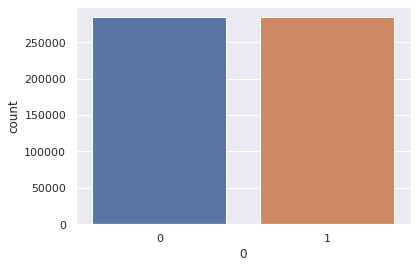

In [ ]:
sns.countplot(y_resample_ada.iloc[:,0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample_ada, y_resample_ada, test_size = 0.3, random_state=142)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
logregada = LogisticRegression()
logregada.fit(X_train, y_train)

lr_pred_ada = logregada.predict(X_test)
print("Accuracy {}".format(metrics.accuracy_score(y_test, lr_pred_ada)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, lr_pred_ada)))
print(confusion_matrix(y_test, lr_pred_ada))
print(classification_report(y_test, lr_pred_ada))

tpr = recall_score(y_test, lr_pred_ada)
tnr = recall_score(y_test, lr_pred_ada, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Accuracy 0.9750445528302771
Recall/Sensitivity 0.9585804386708087
[[84863   737]
 [ 3520 81464]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     85600
           1       0.99      0.96      0.97     84984

    accuracy                           0.98    170584
   macro avg       0.98      0.97      0.98    170584
weighted avg       0.98      0.98      0.98    170584

False Positive rate =0.009
True Positive Rate = 0.959
False Negative rate =0.041
True Negative Rate = 0.991


Logistic: ROC AUC=0.996


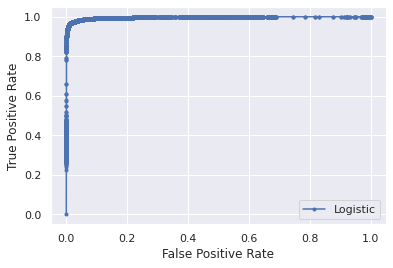

In [ ]:
lr_probad = logregada.predict_proba(X_test)
lr_probad = lr_probad[:, 1]


lr_auc = roc_auc_score(y_test, lr_probad)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probad)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [ ]:
rf_model_ada = RandomForestClassifier()

rf_model_ada.fit(X_train, y_train)

rf_pred_ada = rf_model_ada.predict(X_test)
print("Accuracy {}".format(metrics.accuracy_score(y_test, rf_pred_ada)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, rf_pred_ada)))
print(confusion_matrix(y_test,rf_pred_ada))
print(classification_report(y_test, rf_pred_ada))

tpr = recall_score(y_test, rf_pred_ada)
tnr = recall_score(y_test, rf_pred_ada, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Accuracy 0.9998827557097969
Recall/Sensitivity 1.0
[[85580    20]
 [    0 84984]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85600
           1       1.00      1.00      1.00     84984

    accuracy                           1.00    170584
   macro avg       1.00      1.00      1.00    170584
weighted avg       1.00      1.00      1.00    170584

False Positive rate =0.000
True Positive Rate = 1.000
False Negative rate =0.000
True Negative Rate = 1.000


Random Forest: ROC AUC=1.000


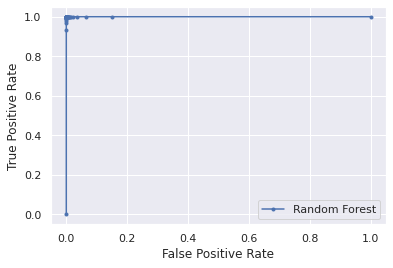

In [ ]:
rf_prob_ada = rf_model_ada.predict_proba(X_test)
rf_prob_ada = rf_prob_ada[:, 1]


rf_auc = roc_auc_score(y_test, rf_prob_ada)
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob_ada)
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [ ]:
gbc_ada = GradientBoostingClassifier()
gbc_ada.fit(X_train, y_train)
gbc_pred_ada = gbc_ada.predict(X_test)

print("Accuracy {}".format(metrics.accuracy_score(y_test, gbc_pred_ada)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, gbc_pred_ada)))
print(confusion_matrix(y_test, gbc_pred_ada))
print(classification_report(y_test, gbc_pred_ada))

tpr = recall_score(y_test, gbc_pred_ada)
tnr = recall_score(y_test, gbc_pred_ada, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Accuracy 0.9866517375603808
Recall/Sensitivity 0.9797373623270262
[[85045   555]
 [ 1722 83262]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     85600
           1       0.99      0.98      0.99     84984

    accuracy                           0.99    170584
   macro avg       0.99      0.99      0.99    170584
weighted avg       0.99      0.99      0.99    170584

False Positive rate =0.006
True Positive Rate = 0.980
False Negative rate =0.020
True Negative Rate = 0.994


Gradient Boosting: ROC AUC=0.999


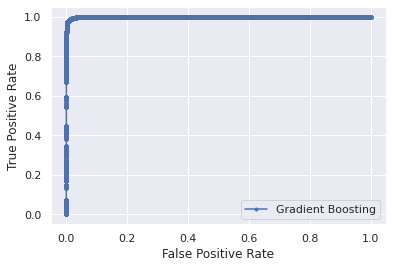

In [ ]:
gbc_prob_ada = gbc_ada.predict_proba(X_test)
gbc_prob_ada = gbc_prob_ada[:, 1]


gbc_auc = roc_auc_score(y_test, gbc_prob_ada)
print('Gradient Boosting: ROC AUC=%.3f' % (gbc_auc))
gbc_fpr, gbc_tpr, _ = roc_curve(y_test, gbc_prob_ada)
pyplot.plot(gbc_fpr, gbc_tpr, marker='.', label='Gradient Boosting')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [ ]:
xgb_ada = XGBClassifier()
xgb_ada.fit(X_train, y_train)
xgb_pred_ada = xgb_ada.predict(X_test)

print("Accuracy {}".format(metrics.accuracy_score(y_test, xgb_pred_ada)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, xgb_pred_ada)))
print(confusion_matrix(y_test, xgb_pred_ada))
print(classification_report(y_test, xgb_pred_ada))

tpr = recall_score(y_test, xgb_pred_ada)
tnr = recall_score(y_test, xgb_pred_ada, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Accuracy 0.9865227688411574
Recall/Sensitivity 0.979572625435376
[[85037   563]
 [ 1736 83248]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     85600
           1       0.99      0.98      0.99     84984

    accuracy                           0.99    170584
   macro avg       0.99      0.99      0.99    170584
weighted avg       0.99      0.99      0.99    170584

False Positive rate =0.007
True Positive Rate = 0.980
False Negative rate =0.020
True Negative Rate = 0.993


XGBoost: ROC AUC=0.999


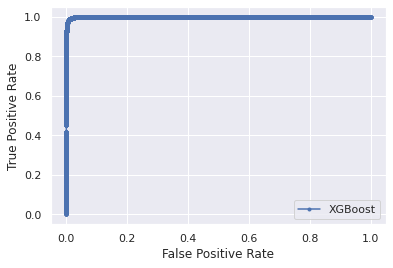

In [ ]:
xgb_prob_ada = xgb_ada.predict_proba(X_test)
xgb_prob_ada = xgb_prob_ada[:, 1]


xgb_auc = roc_auc_score(y_test, xgb_prob_ada)
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_prob_ada)
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [ ]:
input_n = X_train.shape[1]
model_ada = Sequential()

model_ada.add(Dense(65, input_shape=(input_n,), kernel_initializer='he_normal' ,activation='relu'))
#model.add(Dropout(0.2))
model_ada.add(Dense(20, activation='relu'))
model_ada.add(Dense(20, activation='relu'))
#modelsm.add(Dropout(0.2))
model_ada.add(Dense(1, activation='sigmoid'))
model_ada.summary()

model_ada.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
history = model_ada.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.3)
print(history.history.keys())

#return model

#_,accuracy = model.evaluate(X,y)
#print('Accuracy: %2f' % (accuracy*100))

yhat_prob_ada = model_ada.predict(X_test, verbose=0)

yhat_classes_ada = model_ada.predict_classes(X_test, verbose=0)

yhat_prob_ada = yhat_prob_ada[:, 0]
yhat_classes_ada = yhat_classes_ada[:, 0]


accuracy = accuracy_score(y_test, yhat_classes_ada)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, yhat_classes_ada)
print('Precision: %f' % precision)

recall = recall_score(y_test, yhat_classes_ada)
print('Recall: %f' % recall)

f1 = f1_score(y_test, yhat_classes_ada)
print('F1 score: %f' % f1)

auc = roc_auc_score(y_test, yhat_prob_ada)
print('ROC AUC: %f' % auc)

matrix = confusion_matrix(y_test, yhat_classes_ada)
print(matrix)

tpr = recall_score(y_test, yhat_classes_ada)
tnr = recall_score(y_test, yhat_classes_ada, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 65)                2015      
_________________________________________________________________
dense_9 (Dense)              (None, 20)                1320      
_________________________________________________________________
dense_10 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 3,776
Trainable params: 3,776
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
27862/27862 [==============================] - 79s 3ms/step - loss: 0.1296 - accuracy: 0.9525 - val_loss: 0.0772 - val_accuracy: 0.9730
Epoch 2/10
27862/27862 [==============================] - 79s 3ms/step - loss: 0.0780 - accuracy: 0.972

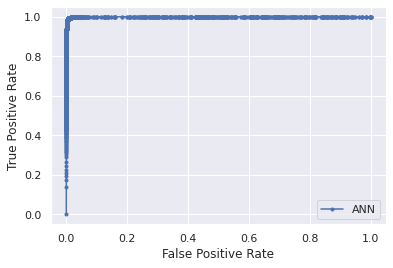

In [ ]:
ann_fpr, ann_tpr, _ = roc_curve(y_test, yhat_prob_ada)
pyplot.plot(ann_fpr, ann_tpr, marker='.', label='ANN')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

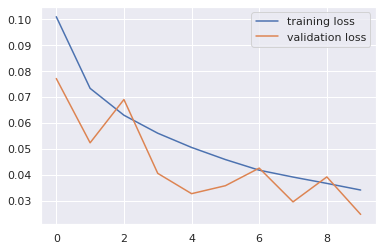

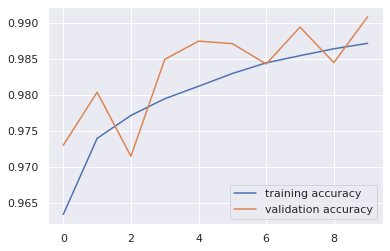

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()

plt.figure()
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

plt.show()